# Practical 3: MNIST

This is the first task of Practical 3. Your task is to build a (convolutional) neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 

You should get an accuracy of **at least 97%** to pass the practical. 

The model files might be too large to be uploaded to GitHub. 
Please use the following link to upload your models: https://seafile.ifi.uzh.ch/u/d/695f63e725b641ed8633/

Name the model file `{repository_name}-MNIST.h5`. For example, if your repository is FDS22-M0, you should name the model file `FDS22-M0-MNIST.h5`. If you are not satisfied with the model you have uploaded, you can upload a new one with the same name. We will only look at the newest model. Nevertheless, try to upload as few times as possible, since the online drive has a limited amount of space. 

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.9.2'

In [3]:
tf.keras.__version__

'2.9.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

11490434/11490434 [==============================] - 2s 0us/step


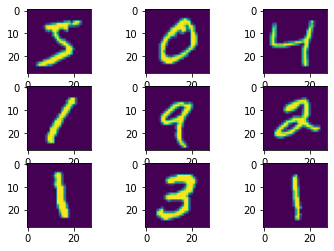

X train: (60000, 28, 28, 1)
y train: (60000, 10)
X test:  (10000, 28, 28, 1)
y test:  (10000, 10)


In [4]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

# Add a channel for RGB
X_train_full = X_train_full.reshape((X_train_full.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# One-hot encoding
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0

# Get validation dataset
np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

print('X train: ' + str(X_train_full.shape)) # 60K images / dimension 28*28 / 1 channel
print('y train: ' + str(y_train_full.shape))
print('X test:  '  + str(X_test.shape))
print('y test:  '  + str(y_test.shape))

## Build and train the model

Build and train your model. 

In [5]:
# TODO: Build your model
# 784 input (28*28 pixels) -> 64 -> 128 -> 256 -> 128 -> 64 -> 10 -> output: digit prediction in one hot encoding
# structure: input size (28*28), hidden layers sizes, # of classes (10)
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", kernel_initializer='he_uniform', padding="same", input_shape=[28, 28, 1]), # Xtrain 28,28,1
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(), # starting fully connected layers
    keras.layers.Dense(128, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [6]:
# show the structure of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [7]:
# Compile & train the model
batch = 32
epoch = 30

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=batch, epochs=epoch, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 24s 8ms/step - loss: 0.7278 - accuracy: 0.7551 - val_loss: 0.0858 - val_accuracy: 0.9780
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2325 - accuracy: 0.9331 - val_loss: 0.0657 - val_accuracy: 0.9866
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1570 - accuracy: 0.9543 - val_loss: 0.0759 - val_accuracy: 0.9830
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1181 - accuracy: 0.9645 - val_loss: 0.0665 - val_accuracy: 0.9880
Epoch 5/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1012 - accuracy: 0.9730 - val_loss: 0.0542 - val_accuracy: 0.9896
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0766 - accuracy: 0.9784 - val_loss: 0.0662 - val_accuracy: 0.9878
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0654 - accuracy: 0.9809 - val_loss: 0.0619 - val_ac

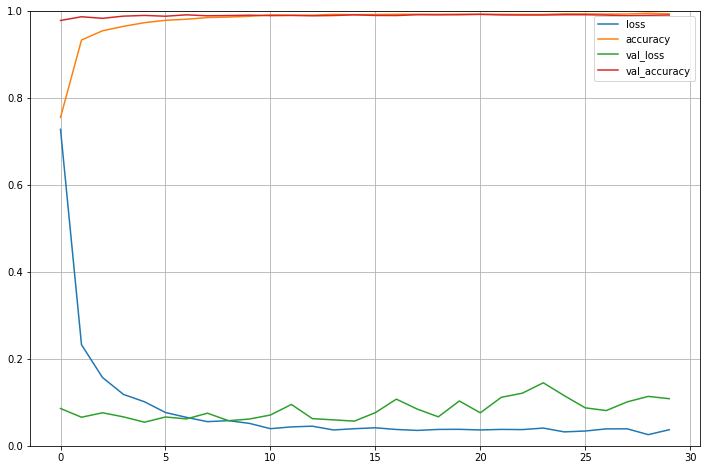

In [8]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

Save and upload your trained model to the seafile link we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [9]:
model.save('FDS22-M029-MNIST.h5') # change the file name according to your repository name

from google.colab import files
files.download('FDS22-M029-MNIST.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Load the model and evaluate it on the test data

In [10]:
model = keras.models.load_model("FDS22-M029-MNIST.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0616 - accuracy: 0.9921


[0.061626385897397995, 0.9921000003814697]

## Short report

We referred to the following resources to build a CNN model.:
1. https://www.kaggle.com/code/elcaiseri/mnist-simple-cnn-keras-accuracy-0-99-top-1
2. https://keras.io/examples/vision/mnist_convnet/

`````
Preprocessing
`````
We reshaped the data to add a channel for colours. Then, we implemented one-hot encoding for representing features in binary values. The values of train data were divided by 255.0 for normalisation, as the CNN converges faster on [0,1].


`````
Build the model
`````
The first is the convolutional (Conv2D) layer. I chose to set 64 filters (neurons) for the 1st layer, two layers with 128 filters for the 2nd layers, and then 256 filters for two 3rd layers. Each filter transforms a part of the image using the kernel filter. The kernel filter matrix was applied to the whole images. To reduce the computational cost and overfitting, we added the pooling (MaxPool2D) layers with the pool size of 2 after each layer with filters. With these convolutional and pooling layers, CNN are able to combine local features and learn more global features of the images. For an activation function, we chose ReLU because it is fast to compute. Accordingly, we implemented he_uniform as a kernel initialiser.

We used the Flatten layers to convert the final feature maps into a 1D vector. In the end, we used the features in two fully-connected (Dense) layers. In the last layer(Dense(10,activation="softmax")), the net returns the distribution of probability of each class.


`````
Train the model & Result
`````
Since this is a multi-class problem (10 categories), we used the categorical_crossentropy function to measure loss. For an optimiser, we chose adam as it was the best optimiser, which combined the ideas of momentum optimisation and adaptive learning rates. Moreover, as we adopted mini-batch gradient descent, we set the batch size to 32. Also, this is a default value of the batch size of MNIST. The number of epochs was 30, as a number larger than that led to overfitting.

As a result, the model showed the accruacy of 98.95%.